You can perform PID on MI(r;(x,v)), and compare the result of different 'x'.
'x' can from experimental data or produce in this code for different Tau (Gramma) or cutoff frequency
'r' can be real responses of RGC or from NGD or from x+$\Delta$*v.
Using 20200408 Chou's data, unit2.

# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
from scipy.stats import loglaplace,chi2

from labellines import labelLine, labelLines
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Documents\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb


# load files

In [3]:
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code')
except:
    os.chdir('C:\\Documents\\GitHub\\python-code')

loadfiles = np.load('4PID_paper\\lambda vs. PI\\PeakHeightnTime vs Fc.npz', allow_pickle=True)
# loadfiles = np.load('4PID_paper\\lambda vs. PI\\PeakHeightnTime vs Fc fr=2.npz', allow_pickle=True)
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]

loadfiles = np.load('4PID_paper\\beta vs. PI\\PeakHeightnTime vs Fc.npz', allow_pickle=True)
for k in loadfiles.files:
    vars()['b_'+k] = loadfiles[k][()]

Fc_list = [2,4,7,10]
filenames = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_OU_cutoff='+str(Fc)+'_sort_unit2' for Fc in Fc_list]
dt = 0.01
# pcells = [1,20,33,39,40,42,53]
# pcell_pos = [[1,7], [3,3], [5,6], [6,8], [6,7], [6,5], [7,2]]
pcells = [20,33,40,42,53]
pcell_pos = [[3,3], [5,6], [6,7], [6,5], [7,2]]
x_list, T_list, rstate_list = expSnR(filenames, dt, 'LED', pcells)

In [4]:
t_cor_list = []
for i in range(len(x_list)):
    x_cor = np.correlate(x_list[i], x_list[i], "same")
    x_cor = x_cor[:int((len(x_cor)+1)/2)+1]
    Taxis = np.flip(T_list[i][:len(x_cor)]-dt/2)
    t_cor_list.append( round(np.interp(0.5*max(x_cor),  x_cor, Taxis), 3))
t_cor_list

[0.524, 0.422, 0.395, 0.385]

# plot $\Pi$ vs. $F_c$ with various $\lambda$ (Model)

In [5]:
model_Uvox_ratio_list_list = []
b_model_Uvox_ratio_list_list = []
Lambda_list = np.arange(0.3,0.85,0.05)
beta_list = (1-Lambda_list)/Lambda_list
for Lambda in Lambda_list:
    model_Uvox_ratio_list = []
    b_model_Uvox_ratio_list = []
    for i in range(len(Fc_list)):
        Uvox_ratio_table = ndimage.gaussian_filter1d(Uv_peakH_list[i]/Ux_peakH_list[i], sigma=1, mode='reflect')
        model_Uvox_ratio = np.interp(Lambda, Lambdas, Uvox_ratio_table)
        model_Uvox_ratio_list.append(model_Uvox_ratio.copy())
        
        b_Uvox_ratio_table = ndimage.gaussian_filter1d(b_Uv_peakH_list[i]/b_Ux_peakH_list[i], sigma=1, mode='reflect')
        b_model_Uvox_ratio = np.interp(Lambda, b_Lambdas, b_Uvox_ratio_table)
        b_model_Uvox_ratio_list.append(b_model_Uvox_ratio.copy())
    model_Uvox_ratio_list_list.append(model_Uvox_ratio_list.copy())
    b_model_Uvox_ratio_list_list.append(b_model_Uvox_ratio_list.copy())
model_Uvox_ratio_list_list = np.array(model_Uvox_ratio_list_list)
b_model_Uvox_ratio_list_list = np.array(b_model_Uvox_ratio_list_list)

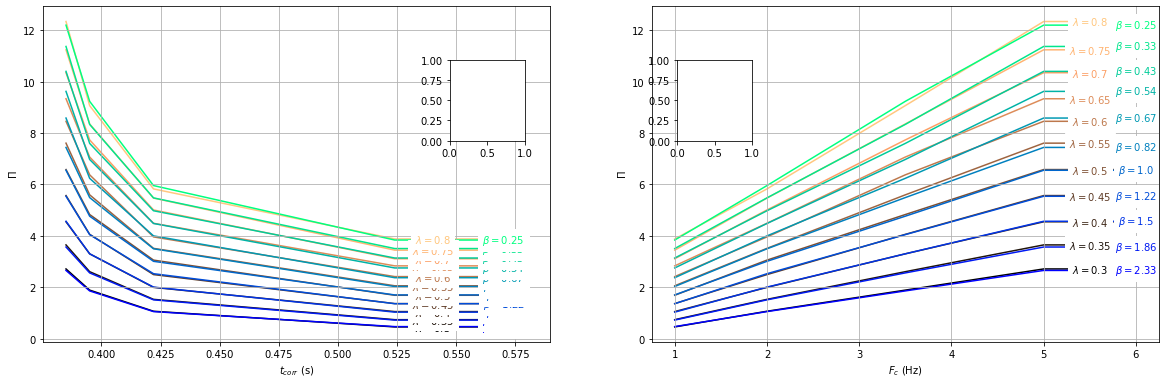

In [6]:
THEfig, (THEax1, THEax2) = plt.subplots(1,2)
THEax1.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(model_Uvox_ratio_list_list)))))
THEax2.set_prop_cycle(plt.cycler('color', plt.cm.copper(np.linspace(0, 1, len(model_Uvox_ratio_list_list)))))
axin2 = THEax2.inset_axes([0.05, 0.60, 0.12*(np.sqrt(5)-1), 0.24])
axin1 = THEax1.inset_axes([0.95-0.12*(np.sqrt(5)-1), 0.60, 0.12*(np.sqrt(5)-1), 0.24])
# ax.plot(Fc_list, model_Uvox_ratio_list_list.T, zorder=1)
pt_cor_list = np.append(np.flip(t_cor_list), 0.58)
pFc_list = np.append(Fc_list, 6.*2)
for i in range(len(model_Uvox_ratio_list_list)):
    pmodel_Uvox_ratio = np.append((model_Uvox_ratio_list_list[i]), model_Uvox_ratio_list_list[i][-1])
    THEax2.plot(pFc_list/2, pmodel_Uvox_ratio, zorder=1, label=r'$\lambda=$'+str(np.round(Lambda_list[i],2)) )
    pmodel_Uvox_ratio = np.append(np.flip(model_Uvox_ratio_list_list[i]), model_Uvox_ratio_list_list[i][0])
    THEax1.plot(pt_cor_list, pmodel_Uvox_ratio, zorder=1, label=r'$\lambda=$'+str(np.round(Lambda_list[i],2)) )

THEax1.set_prop_cycle(plt.cycler('color', plt.cm.winter(np.linspace(0, 1, len(model_Uvox_ratio_list_list)))))
THEax2.set_prop_cycle(plt.cycler('color', plt.cm.winter(np.linspace(0, 1, len(model_Uvox_ratio_list_list)))))
for i in range(len(model_Uvox_ratio_list_list)):
    pmodel_Uvox_ratio = np.append((b_model_Uvox_ratio_list_list[i]), b_model_Uvox_ratio_list_list[i][-1])
    THEax2.plot(pFc_list/2, pmodel_Uvox_ratio, zorder=1, label=r'$\beta=$'+str(np.round(beta_list[i],2)) )
    pmodel_Uvox_ratio = np.append(np.flip(b_model_Uvox_ratio_list_list[i]), b_model_Uvox_ratio_list_list[i][0])
    THEax1.plot(pt_cor_list, pmodel_Uvox_ratio, zorder=1, label=r'$\beta=$'+str(np.round(beta_list[i],2)) )
    
THEax1.set_xlabel(r'$t_{corr}$ (s)')
THEax2.set_xlabel(r'$F_{c}$ (Hz)')
THEax1.set_ylabel(r'$\Pi$')
THEax2.set_ylabel(r'$\Pi$')
THEax1.grid()
THEax2.grid()
txvals = len(model_Uvox_ratio_list_list)*[0.54]
txvals.extend(len(model_Uvox_ratio_list_list)*[0.57])
fxvals = len(model_Uvox_ratio_list_list)*[5.5]
fxvals.extend(len(model_Uvox_ratio_list_list)*[6.])
labelLines(THEax1.get_lines(),zorder=2.5, xvals=txvals)
labelLines(THEax2.get_lines(),zorder=2.5, xvals=fxvals)
a = 5
THEfig.set_size_inches(a*4, a*(np.sqrt(5)-1))


## Plot TLPI properties

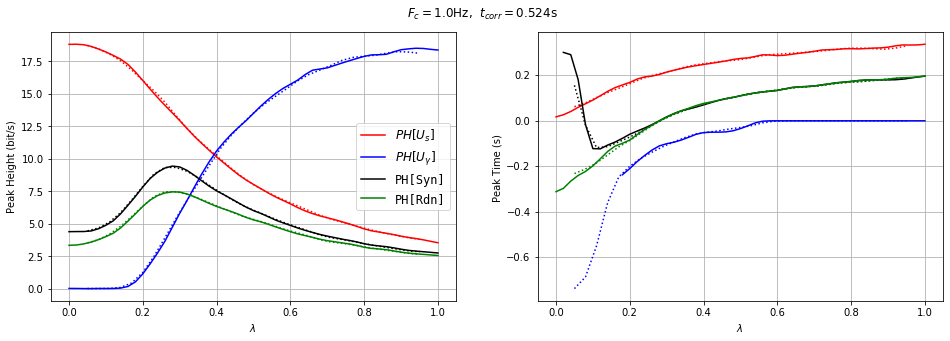

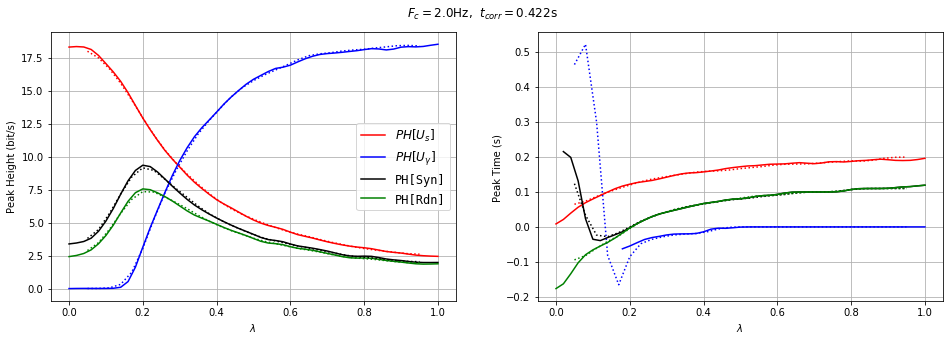

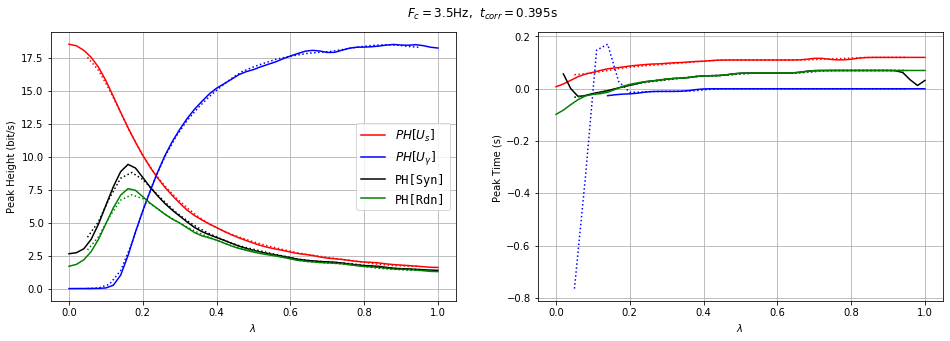

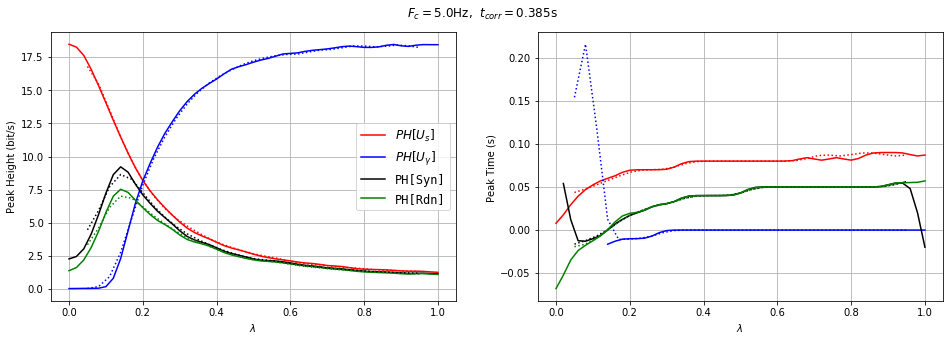

In [7]:
for i in range(len(Fc_list)):
    fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2) 
    fig.set_size_inches(16, 4*(np.sqrt(5)-1))
    fig.suptitle(r'$F_c = $'+ str(Fc_list[i]/2)+'Hz,  '+r'$t_{corr}=$'+str(round(t_cor_list[i],3))+'s',y =0.95)
    ax2.plot(Lambdas,ndimage.gaussian_filter1d(Ux_peakH_list[i], sigma=1, mode='reflect'), 'r-')
    ax2.plot(Lambdas,ndimage.gaussian_filter1d(Uv_peakH_list[i], sigma=1, mode='reflect'), 'b-')
    ax2.plot(Lambdas,ndimage.gaussian_filter1d(Syn_peakH_list[i], sigma=1, mode='reflect'), 'k-')
    ax2.plot(Lambdas,ndimage.gaussian_filter1d(Rdn_peakH_list[i], sigma=1, mode='reflect'), 'g-')
    
    ax2.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Ux_peakH_list[i], sigma=1, mode='reflect'), 'r:')
    ax2.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Uv_peakH_list[i], sigma=1, mode='reflect'), 'b:')
    ax2.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Syn_peakH_list[i], sigma=1, mode='reflect'), 'k:')
    ax2.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Rdn_peakH_list[i], sigma=1, mode='reflect'), 'g:')
    
    ax2.set_xlabel(r'$\lambda $ ')
    ax2.set_ylabel(r'Peak Height (bit/s)')
    ax2.grid(True)
    ax2.legend((r'$PH[U_s]$', r'$PH[U_{\gamma}]$', 'PH[Syn]', 'PH[Rdn]'), loc='best', prop={'size': 'large', 'family': 'monospace'})
        
    ax3.plot(Lambdas,ndimage.gaussian_filter1d(Ux_peaktime_list[i], sigma=1, mode='reflect'), 'r-')
    ax3.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Ux_peaktime_list[i], sigma=1, mode='reflect'), 'r:')
    usefullI = np.where(Uv_peakH_list[i]>=0.08)
    ax3.plot(Lambdas[usefullI],ndimage.gaussian_filter1d(Uv_peaktime_list[i][usefullI], sigma=1, mode='reflect'), 'b-')
    ax3.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Uv_peaktime_list[i], sigma=1, mode='reflect'), 'b:')
    usefullI = np.where(Syn_peakH_list[i]>=8)
    usefullI =np.arange(1,51)
    ax3.plot(Lambdas[usefullI],ndimage.gaussian_filter1d(Syn_peaktime_list[i][usefullI], sigma=1, mode='reflect'), 'k-')
    ax3.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Syn_peaktime_list[i], sigma=1, mode='reflect'), 'k:')
    usefullI = np.where(Rdn_peakH_list[i]>=1)
    usefullI =np.arange(0,51)
    ax3.plot(Lambdas[usefullI],ndimage.gaussian_filter1d(Rdn_peaktime_list[i][usefullI], sigma=1, mode='reflect'), 'g-')
    ax3.plot(b_Lambdas,ndimage.gaussian_filter1d(b_Rdn_peaktime_list[i], sigma=1, mode='reflect'), 'g:')
    ax3.set_xlabel(r'$\lambda$ ')
    ax3.set_ylabel('Peak Time (s) ')
#     ax3.legend( (r'$PT[U_s]$', r'$PT[U_{\gamma}]$', 'PT[Syn]', 'PT[Rdn]'), loc='best', prop={'size': 'large', 'family': 'monospace'})
    ax3.grid(True)

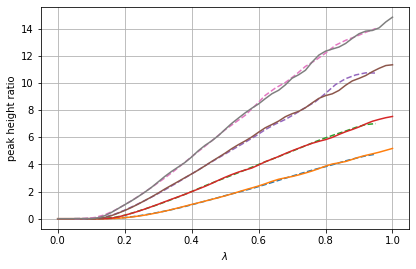

In [8]:
Phi_list = []
for i in range(len(Fc_list)):
    Phi = ndimage.gaussian_filter1d(Uv_peakH_list[i]/Ux_peakH_list[i], sigma=1, mode='reflect')
    ngd_Phi = ndimage.gaussian_filter1d(b_Uv_peakH_list[i]/b_Ux_peakH_list[i], sigma=1, mode='reflect')
    plt.plot(b_Lambdas,ngd_Phi,linestyle = 'dashed')
    plt.plot(Lambdas,Phi)
plt.gcf().set_size_inches(6.6, 3.3*(np.sqrt(5)-1))
plt.xlabel(r'$\lambda$ ')
plt.ylabel('peak height ratio')
plt.grid()

# scatter experimental result  

In [9]:
Dt = 0.01
v_list = [np.append(np.zeros(int(Dt/dt)), x[int(Dt/dt):]-x[:-int(Dt/dt)])/Dt  for x in x_list]
tv_list = [np.append(0, np.diff(x))/dt  for x in x_list]

xstate_list = [EqualState(x, 6)[0] for x in x_list]
vstate_list = [EqualState(v, 6)[0] for v in v_list]
tvstate_list = [EqualState(tv, 6)[0] for tv in tv_list]

In [11]:
Uvox_ratio_list_cells = []
Syn_PT_list_cells = [] #actually I use redundancy
mSyn_PT_list_cells = []

window = [-1,1] # second
for pcell in pcells:
    Information_list = [0]*len(x_list)
    Uvox_ratio_list = []
    Syn_PT_list = []
    mSyn_PT_list = []
    for i in range(len(x_list)):
        timeshift, Information_list[i] = PIfunc(rstate_list[i][pcell-1], xstate_list[i], vstate_list[i], dt, window)
        Uvox_ratio_table = ndimage.gaussian_filter1d(Uv_peakH_list[i]/Ux_peakH_list[i], sigma=1, mode='reflect')
        Uvox_ratio = max(Information_list[i][('Beer','UIv')])/max(Information_list[i][('Beer','UIx')])
        Syn_PT = np.interp(Uvox_ratio, Uvox_ratio_table[5:-5], ndimage.gaussian_filter1d(Rdn_peaktime_list[i][5:-5], sigma=1, mode='reflect'))
        Uvox_ratio_list.append(Uvox_ratio)
        mSyn_PT_list.append(Syn_PT)
        Syn_PT_list.append(timeshift[np.argmax(Information_list[i][('Beer','Red')])])
    
    Uvox_ratio_list_cells.append(Uvox_ratio_list.copy())
    Syn_PT_list_cells.append(Syn_PT_list.copy())
    mSyn_PT_list_cells.append(mSyn_PT_list.copy())

In [ ]:
THEax1.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
THEax2.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
axin1.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
axin2.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
for p in range(len(pcells)):
    THEax2.scatter(np.array(Fc_list)/2, np.array(Uvox_ratio_list_cells[p]), zorder=2 )
    THEax1.scatter(t_cor_list, np.array(Uvox_ratio_list_cells[p]), zorder=2)
    axin1.scatter(pcell_pos[p][0], pcell_pos[p][1], s =[10])
    axin2.scatter(pcell_pos[p][0], pcell_pos[p][1], s =[10])
THEfig

## Processing time

In [ ]:
figp, (axp1, axp2) = plt.subplots(1,2)
axp1.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
axp2.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
for p in range(len(pcells)):
    axp2.plot(np.array(Fc_list)/2, Syn_PT_list_cells[p], zorder=2)
    axp1.plot(t_cor_list, Syn_PT_list_cells[p], zorder=2)
for p in range(len(pcells)):
    axp2.plot(np.array(Fc_list)/2, mSyn_PT_list_cells[p], zorder=2, linestyle='dashed')
    axp1.plot(t_cor_list, mSyn_PT_list_cells[p], zorder=2, linestyle='dashed')
# axp1.legend( ('1', '20', '33', '39'), loc='best', prop={'size': 'large', 'family': 'monospace'})
# axp2.legend( ('1', '20', '33', '39'), loc='best', prop={'size': 'large', 'family': 'monospace'})
axp1.grid()
axp2.grid()
axp1.set_ylabel('PT[Syn]')
axp1.set_xlabel(r'$t_{corr}$ (s)')
axp2.set_ylabel('PT[Syn]')
axp2.set_xlabel(r'$F_{c}$ (Hz)')
a = 5
figp.set_size_inches(a*4, a*(np.sqrt(5)-1))

In [ ]:
figp, (axp1, axp2) = plt.subplots(1,2)
axp1.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
axp2.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(pcells )))))
for p in range(len(pcells)):
    axp2.plot(np.array(Fc_list)/2, np.array(mSyn_PT_list_cells[p])-np.array(Syn_PT_list_cells[p]), zorder=2)
    axp1.plot(t_cor_list, np.array(mSyn_PT_list_cells[p])-np.array(Syn_PT_list_cells[p]), zorder=2)
# axp1.legend( ('1', '20', '33', '39'), loc='best', prop={'size': 'large', 'family': 'monospace'})
# axp2.legend( ('1', '20', '33', '39'), loc='best', prop={'size': 'large', 'family': 'monospace'})
axp1.grid()
axp2.grid()
axp1.set_ylabel('Processing time (s)')
axp1.set_xlabel(r'$t_{corr}$ (s)')
axp2.set_ylabel('Processing time (s)')
axp2.set_xlabel(r'$F_{c}$ (Hz)')
a = 4
figp.set_size_inches(a*4, a*(np.sqrt(5)-1))

# for paper

In [ ]:
# import pandas as pd
# data = np.hstack((model_Uvox_ratio_list_list.T,Fc_list[:,np.newaxis]/2,np.array(t_cor_list)[:,np.newaxis]))
# data_df = pd.DataFrame(data)

# name  = 'PivsFc'
# writer = pd.ExcelWriter('D:\\GoogleDrive\\retina\\PID_paper\\For Origin Plot\\'+name+'.xlsx')
# # create and writer pd.DataFrame to excel
# data_df.to_excel(writer,'page_1',float_format='%.5f') # float_format 控制精度
# writer.save()

In [ ]:
# import pandas as pd
# data_df = pd.DataFrame(pcell_pos)
# name  = 'PivsFc_Expt'
# writer = pd.ExcelWriter('D:\\GoogleDrive\\retina\\PID_paper\\For Origin Plot\\'+name+'.xlsx')
# # create and writer pd.DataFrame to excel
# data_df.to_excel(writer,'pos',float_format='%.5f') # float_format 控制精度


# data_df = pd.DataFrame(np.array(Uvox_ratio_list_cells).T)
# data_df.to_excel(writer,'Pivtau',float_format='%.5f') # float_format 控制精度
# writer.save()